<a href="https://colab.research.google.com/github/Vankum100/colabs/blob/neural-networks-miet/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$y_{k}(n) = \frac{D}{1-DF}[x_{j}(n)]$

$y_{k}(n) = \frac{w}{1-wz^{-1}}[x_{j}(n)]$ - по определению D и F

$y_{k}(n) = w(1-wz^{-1})^{-1}[x_{j}(n)]$

$y_{k}(n) = w\sum C_{-1}^{l}(-wz^{-1})^{l}[x_{j}(n)]$ - раскладываем в бином Ньютона

$y_{k}(n) = w\sum_{l=0}^{n} (-1)^{l}\frac{(1+l-1)!}{l!0!}(-wz^{-1})^{l}[x_{j}(n)]$ - раскладываем биноминальный 
коэффициент по формуле для отрицательного показателя

$y_{k}(n) = w\sum_{l=0}^{n} (-1)^{2l}\frac{l!}{l!}(wz^{-1})^{l}[x_{j}(n)]$

$y_{k}(n) = w\sum_{l=0}^{n}w^lz^{-l}[x_{j}(n)]$

$y_{k}(n) = \sum_{l=0}^{n}w^{l+1}z^{-l}[x_{j}(n)]$ - раскрываем $z^{-1}$ по определению

$y_{k}(n) = \sum_{l=0}^{n}w^{l+1}x_{j}(n-l)$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ds_fb(x, n, w):
    y = [x*w]
    for l in range(n):
        y.append(w*y[-1])
    return y

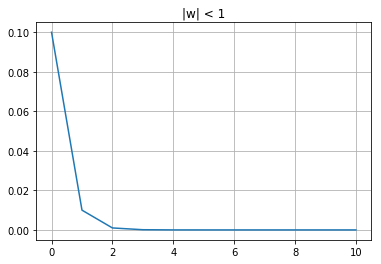

In [ ]:
plt.plot(range(11),ds_fb(1, 10, 0.1))
plt.grid()
plt.title('|w| < 1')
plt.show()

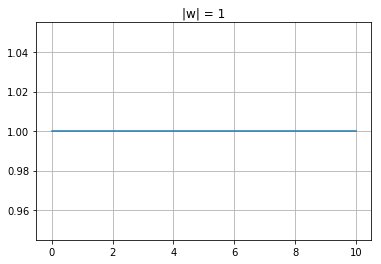

In [ ]:
plt.plot(range(11),ds_fb(1, 10, 1))
plt.grid()
plt.title('|w| = 1')
plt.show()

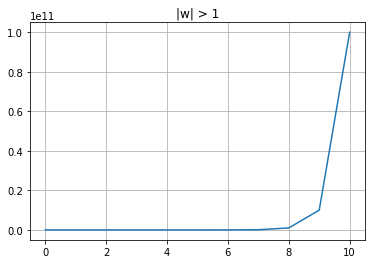

In [ ]:
plt.plot(range(11),ds_fb(1, 10, 10))
plt.grid()
plt.title('|w| > 1')
plt.show()

In [ ]:
def task4(N, x):
    x = x.T
    sz1, sz2 = x.shape
    if sz1 > N / (2*np.log(N)) or N < sz2:
        print('Сеть с таким количеством нейронов не способна запомнить данные образцы')
        W = -1
    else:
        if (sz2 < N):
            x = np.append(np.ones((sz1, N - sz2)), x)
        W = x.T * x
        for i in range(N):
            W[i, i] = 0
    return W

In [ ]:
x = np.asarray([[1], [-1], [1]])
N = 3
task4(N,x)

array([[ 0, -1,  1],
       [-1,  0, -1],
       [ 1, -1,  0]])

In [ ]:
%run digits.py

In [ ]:
def train_hop_net(digits):
    """
     Настройка нейронной сети Хопфилда. 
     Весовые значения для сети Хопфилда определяются непосресдственно в процессе
     обработки обучающих данных минуя проведение обучения в более привычном
     смысле (сопоставлением "вход-выход").
     Переменная digits = {four five six} - список образцов фундаментальной
     памяти
     Переменная weights определяет матрицу весовых коэффициентов нейронной сети Хопфилда
     (ассоциативной памяти)
    """
    n = len(digits)
    m = len(digits[0])
    arr = np.ndarray((n, m))
    for i in range(n):
        for j in range(m):
            arr[i,j] = digits[i][j]
    return np.dot(arr.T, arr)

In [ ]:
w1 = train_hop_net([zero])

In [ ]:
def test_hop_net(weights, digit, iterations):
    """
    Тестирование нейронной сети Хопфилда
    Переменная weights описывает весовые коэффициенты рекуррентной сети с сохраненными элементами фундаментальной памяти
    Переменная digit - входной образ (может представлять собой и зашумленную версию исходного вектора)
    Переменная iterations - число "эпох" тестирования, имея в виду под эпохой
    полное обновление состояния каждого из нейронов в случайном порядке
    """

    new_digit = np.asarray(digit).copy()

    for epoch in range(iterations):
        update_order = np.random.permutation(range(63))
        # Обновление состояния нейронов в случайном порядке
        for i in range(63):
            neuron = update_order[i]
            net = np.dot(new_digit, weights[:,neuron])
            new_digit[neuron] = np.sign(net)
    return new_digit

In [ ]:
def noisy_digit(digit,noise):
    """
    Создание зашумлённой версии входного образа
    Переменная digit задаёт входной образ из фундаментальной памяти или произвольный образ
    Переменная noise определяет уровень шума, добавляемого к исходному вектору
    """
    if noise<0 or noise>1:
        print('Уровень шума должен быть в пределах от 0 до 1\n')
    return digit + np.random.uniform(-noise, noise, np.asarray(digit).size)

In [ ]:
def visualize_number(num):
    if type(num) != np.ndarray:
        num = np.asarray(num)
    plt.imshow(num.reshape(9, 7), cmap='Greys')
    plt.show()

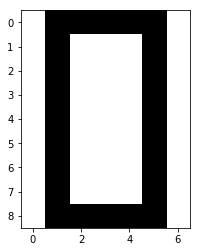

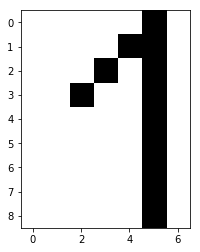

In [ ]:
w = train_hop_net([zero, one])
visualize_number(test_hop_net(w, zero, 1))
visualize_number(test_hop_net(w, one, 1))

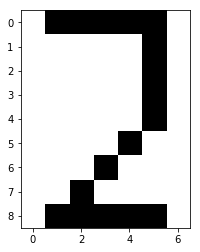

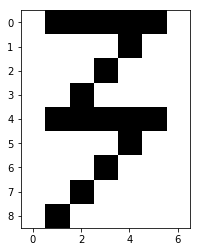

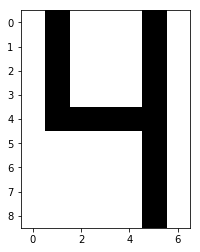

In [ ]:
w = train_hop_net([two, three, four])
visualize_number(test_hop_net(w, two, 1))
visualize_number(test_hop_net(w, three, 1))
visualize_number(test_hop_net(w, four, 1))

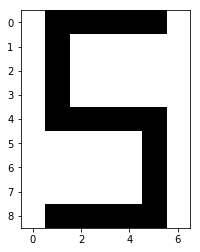

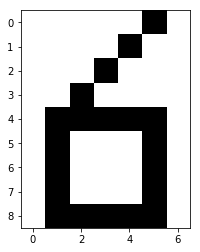

In [ ]:
w = train_hop_net([five, six])
visualize_number(test_hop_net(w, five, 1))
visualize_number(test_hop_net(w, six, 1))

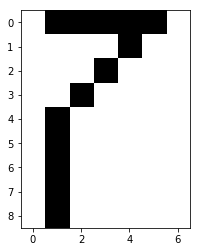

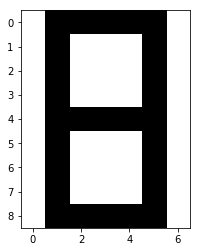

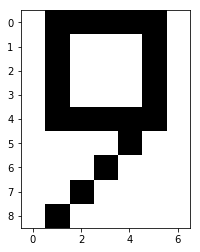

In [ ]:
w = train_hop_net([seven, eight, nine])
visualize_number(test_hop_net(w, seven, 1))
visualize_number(test_hop_net(w, eight, 1))
visualize_number(test_hop_net(w, nine, 1))

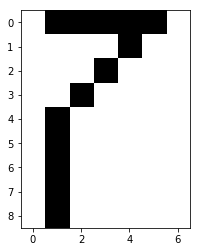

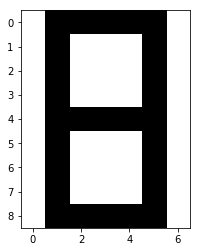

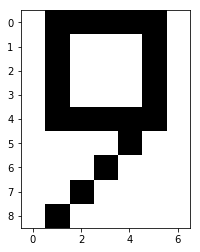

In [ ]:
visualize_number(test_hop_net(w, noisy_digit(seven, 0.3), 1))
visualize_number(test_hop_net(w, noisy_digit(eight, 0.3), 1))
visualize_number(test_hop_net(w, noisy_digit(nine, 0.3), 1))